# Project - Communicate Data findings 

### Indroduction

Ford Go Bike Syatem is a bike sharing system.Ford Go Bike System Provides service in San Francisco, East Bay and San Joe.
Bicycle Sharing systems is very convenient sytem for those who want to take bicycle on rent for short visits.It is very affordable way to visits nearby places with the bicycle.  

###  About Dataset

I choose Ford Go Bike system Data that you can check from this link : https://www.fordgobike.com/system-data as my source data This data set includes information about individual rides made in a bike-sharing system.The features included in the dataset : Trip Duration (seconds) , Start-Time and Date , End-Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

I take data from **2017 to November 2018**

## Preliminary data Wrangling 

In this part i import Some important packages and load the data and i take data from the website of fordbike. i take the record of individual trips from **2017 to November 2018** 

In [19]:

# Import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [20]:
# Create a folder to store zip files 
folder_name_of_csvs = 'Project_files'

# making directory
makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # Code below opens zip file; BytesIO returns a readable and writable view of the contents
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # Extracted the zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [82]:
# Now we merge all locally saved csv into one dataframe names as df_ford 
all_files = []
for file_name in listdir(folder_name_of_csvs):
    all_files.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df_ford1 = pd.concat(all_files)

In [84]:
# Save DataFram to a csv file named as fordbike_main1.csv

df_ford1.to_csv('fordbike_main3.csv')

In [85]:
# Now we load the dataframe.

df_ford1 = pd.read_csv('fordbike_main3.csv')



In [97]:
#make a copy of the datframe so we can see the changes 

df_ford2 = df_ford1.copy()

In [98]:
df_ford2.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer,31.0
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer,53.0
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer,NaN
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer,NaN
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber,21.0


## Visual Assesment and Cleaning 

In [86]:
df_ford1.head()

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,1,1.0,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,2,2.0,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,3,3.0,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,4,4.0,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [87]:
df_ford1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(3), object(7)
memory usage: 309.3+ MB


##### As we seen visually that unnamed : 0 and unnamed 0.1 is not required in dataframe so we drop them

In [88]:
#Drop 2 columns Unnamed :0 and Unnamed :0.1 

df_ford1 = df_ford1.drop(['Unnamed: 0.1','Unnamed: 0'],axis =1)

In [89]:
# New Dataframe info()
df_ford1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 274.9+ MB


In [90]:
#just check the number of rows and column 
df_ford1.shape

(2252058, 16)

In [91]:
# just see the samples of dataframe 
df_ford1.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1714686,1082,No,578,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-08-03 08:41:23.4260,1996.0,Female,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2018-08-03 08:31:44.9310,Customer
1090593,2163,No,907,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-05-09 20:28:25.9050,1993.0,Female,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-05-09 20:13:18.8650,Customer
1432762,24,No,555,92.0,37.772301,-122.393028,Mission Bay Kids Park,2018-07-17 20:30:30.7750,1991.0,Male,81.0,37.775880,-122.393170,Berry St at 4th St,2018-07-17 20:21:15.5690,Subscriber
1892239,3395,No,699,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-09-05 20:39:14.2860,1993.0,Male,50.0,37.780526,-122.390288,2nd St at Townsend St,2018-09-05 20:27:34.5260,Subscriber
1684073,1282,No,603,75.0,37.773793,-122.421239,Market St at Franklin St,2018-08-08 12:39:21.8760,1990.0,Male,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-08-08 12:29:17.9480,Subscriber
1368466,3083,No,282,110.0,37.763708,-122.415204,17th & Folsom Street Park (17th St at Folsom St),2018-07-26 23:13:36.1480,1996.0,Male,75.0,37.773793,-122.421239,Market St at Franklin St,2018-07-26 23:08:53.2040,Subscriber
1715028,800,No,864,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2018-08-03 08:15:42.4660,1982.0,Female,81.0,37.775880,-122.393170,Berry St at 4th St,2018-08-03 08:01:17.8860,Subscriber
278682,2947,NaN,258,100.0,37.767100,-122.410662,Bryant St at 15th St,2017-10-04 12:22:53.0180,1959.0,Male,124.0,37.760447,-122.410807,19th St at Florida St,2017-10-04 12:18:34.1280,Subscriber
126263,234,NaN,607,115.0,37.765026,-122.398773,Jackson Playground,2017-11-17 08:34:08.9710,1980.0,Male,121.0,37.759210,-122.421339,Mission Playground,2017-11-17 08:24:01.3140,Subscriber
2150299,3271,No,362,258.0,37.872355,-122.266447,University Ave at Oxford St,2018-11-21 09:48:23.0110,1998.0,Female,243.0,37.869360,-122.254337,Bancroft Way at College Ave,2018-11-21 09:42:20.6720,Subscriber


In [92]:
# checks the duplicate if any 

df_ford1.duplicated().sum()

0

###### So as we clearly see there is no duplicate in the dataframe.

In [93]:
# Now we see the descriptive statistics of datframe
df_ford1.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,2.252058e+06,2.252058e+06,2.240479e+06,2.252058e+06,2.252058e+06,2.079810e+06,2.240479e+06,2.252058e+06,2.252058e+06
mean,2.101589e+03,9.181335e+02,1.114495e+02,3.776810e+01,-1.223520e+02,1.982467e+03,1.132275e+02,3.776797e+01,-1.223525e+02
std,1.195229e+03,2.686599e+03,9.702559e+01,1.014484e-01,1.556892e-01,1.051074e+01,9.713899e+01,1.015587e-01,1.560933e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.881000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,1.098000e+03,3.580000e+02,2.800000e+01,3.777166e+01,-1.224094e+02,1.977000e+03,3.000000e+01,3.777143e+01,-1.224114e+02
50%,2.131000e+03,5.660000e+02,8.100000e+01,3.778175e+01,-1.223971e+02,1.985000e+03,8.100000e+01,3.778127e+01,-1.223974e+02
75%,3.059000e+03,8.880000e+02,1.790000e+02,3.779539e+01,-1.222948e+02,1.990000e+03,1.800000e+02,3.779539e+01,-1.222948e+02
max,4.466000e+03,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.810000e+02,4.551000e+01,-7.357000e+01


In [94]:
# Filter data and include reasonable member age range 
df_ford1['member_age'] = 2018 -df_ford1['member_birth_year']

In [95]:
df_ford1.sample(20)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
2084347,4400,No,1908,27.0,37.788059,-122.391865,Beale St at Harrison St,2018-10-05 13:38:53.7850,1961.0,Male,27.0,37.788059,-122.391865,Beale St at Harrison St,2018-10-05 13:07:05.4900,Subscriber,57.0
1089745,270,No,374,9.0,37.798572,-122.400869,Broadway at Battery St,2018-05-10 07:38:58.8160,1962.0,Male,22.0,37.789756,-122.394643,Howard St at Beale St,2018-05-10 07:32:43.8320,Subscriber,56.0
815260,3088,No,740,89.0,37.769218,-122.407646,Division St at Potrero Ave,2018-03-06 18:39:08.9230,1989.0,Female,66.0,37.778742,-122.392741,3rd St at Townsend St,2018-03-06 18:26:48.3910,Subscriber,29.0
2198010,667,Yes,511,75.0,37.773793,-122.421239,Market St at Franklin St,2018-11-09 11:20:00.0460,1964.0,Male,41.0,37.781270,-122.418740,Golden Gate Ave at Polk St,2018-11-09 11:11:28.2920,Subscriber,54.0
1897572,967,No,392,341.0,37.336188,-121.889277,Fountain Alley at S 2nd St,2018-09-05 08:55:14.0660,1996.0,Female,312.0,37.329732,-121.901782,San Jose Diridon Station,2018-09-05 08:48:41.5670,Subscriber,22.0
1332239,3178,No,2093,66.0,37.778742,-122.392741,3rd St at Townsend St,2018-06-01 21:37:28.4820,1996.0,Male,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-06-01 21:02:34.9920,Subscriber,22.0
1546397,2835,No,879,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-08-30 17:30:46.1710,1981.0,Male,9.0,37.798572,-122.400869,Broadway at Battery St,2018-08-30 17:16:06.6150,Subscriber,37.0
1705863,933,Yes,406,220.0,37.811351,-122.273422,San Pablo Ave at MLK Jr Way,2018-08-04 18:32:26.3130,1976.0,Female,182.0,37.809013,-122.268247,19th Street BART Station,2018-08-04 18:25:39.8610,Subscriber,42.0
1970895,1753,No,902,60.0,37.774520,-122.409449,8th St at Ringold St,2018-10-23 16:30:04.8380,1989.0,Male,27.0,37.788059,-122.391865,Beale St at Harrison St,2018-10-23 16:15:02.5620,Subscriber,29.0
1579058,2447,No,380,171.0,37.844279,-122.251900,Rockridge BART Station,2018-08-25 07:40:30.9190,1988.0,Female,166.0,37.851376,-122.252523,College Ave at Alcatraz Ave,2018-08-25 07:34:10.4600,Customer,30.0


Text(0.5, 0, 'Age of bike Riders')

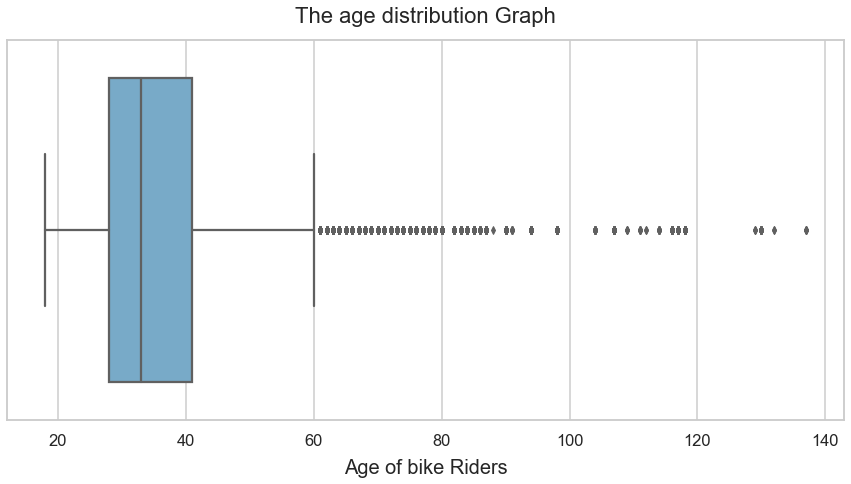

In [96]:
# Now we plot the age distribution Box plot 
# Using seaborn we create a box plot 

#set style 
sns.set_style('whitegrid')
sns.set_context("talk")

#plotting 

plt.figure(figsize=(15,7))
sns.boxplot(x='member_age', data=df_ford1, palette='Blues', orient='h')
plt.title("The age distribution Graph", fontsize=22, y=1.03)
plt.xlabel("Age of bike Riders", fontsize=20, labelpad=10)


####  We can remove the outliers also beacuse we cantain some member in the dataset whose birth year is below 1900 and 
####  his age become over 100 years so for my analysis i take the age group less than or egual to 60 

In [100]:
df_ford1 = df_ford1.query('member_age <= 60')

In [101]:
# change age and birth year to integer
df_ford1.member_age = df_ford1.member_age.astype(int)
df_ford1.member_birth_year = df_ford1.member_birth_year.astype(int)

In [102]:
# check it changes or not.
df_ford1.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer,31
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer,53
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber,21
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer,27
12,2311,NaN,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.7430,1990,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.5810,Subscriber,28


In [104]:
df_ford1.shape

(2032159, 17)

###### Now our dataset is reduced 

##### Again plot the distribution of age upto 60

Text(0.5, 0, 'Age of bike Riders')

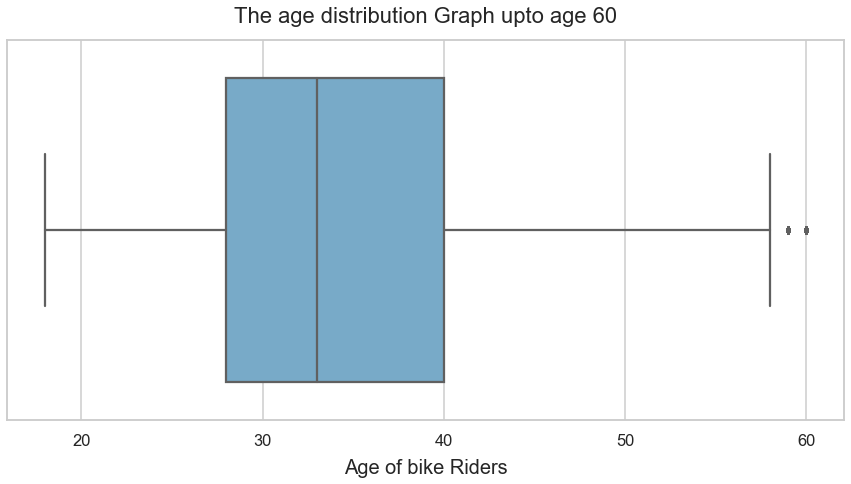

In [106]:
#Now we again plot the graph 
#set style 
sns.set_style('whitegrid')
sns.set_context("talk")

#plotting 

plt.figure(figsize=(15,7))
sns.boxplot(x='member_age', data=df_ford1, palette='Blues', orient='h')
plt.title("The age distribution Graph upto age 60", fontsize=22, y=1.03)
plt.xlabel("Age of bike Riders", fontsize=20, labelpad=10)


In [107]:
df_ford1.member_age.mean()

34.783988359178586

##### so the ford bike users mean age is between ~ 35


#### Now i fix the datatype of some columns which helps in further analysis 

In [110]:
# Now I set start_time and end_time to timestamps
df_ford1.start_time = pd.to_datetime(df_ford1.start_time)
df_ford1.end_time = pd.to_datetime(df_ford1.end_time)

In [111]:
# Now I set user type, gender and bike_share_for_all_trip to category

df_ford1.user_type = df_ford1.user_type.astype('category')
df_ford1.member_gender = df_ford1.member_gender.astype('category')
df_ford1.bike_share_for_all_trip = df_ford1.bike_share_for_all_trip.astype('category')

In [112]:
# set bike id, start_station_id, end_station_id to object
df_ford1.bike_id = df_ford1.bike_id.astype(str)
df_ford1.start_station_id = df_ford1.bike_id.astype(str)
df_ford1.end_station_id = df_ford1.bike_id.astype(str)


#### Now i extract and create new columns Monthname,Month,Weekday,Day of the week and hour from start_time column

In [113]:
# Now i extract month name from start_time column 
df_ford1['st_month_name']=df_ford1['start_time'].dt.strftime('%B')

In [114]:
#Now i  extract month number from start_time column
df_ford1['start_time_month']=df_ford1['start_time'].dt.month.astype(int)

In [115]:
# Now i extract weekdays from start_time column
df_ford1['start_time_weekday']=df_ford1['start_time'].dt.strftime('%a')

In [116]:
# Now i extract day from start_time column
df_ford1['start_time_day']=df_ford1['start_time'].dt.day.astype(int)

In [117]:
# Now i extract hour from start_time column
df_ford1['start_time_hour']=df_ford1['start_time'].dt.hour

In [118]:
# Now i rename the colums Name 
df_ford1.rename(columns={'start_time_month':'start_month',
                          'start_time_weekday':'start_weekday',
                          'start_time_day':'start_day',
                          'start_time_hour':'start_hour'}, 
                 inplace=True)

In [119]:
# Check the changes we done above
df_ford1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032159 entries, 0 to 2252057
Data columns (total 22 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          int32
member_gender              category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 int32
st_month_name              object
start_month                int32
start_weekday              object
start_day                  int32
start_hour                 int64
dtypes: category(3), datetime64[ns](2), float64(4), int32(4), int64(2), object(7)
memory usage: 284.9+ MB


In [120]:
df_ford1.shape

(2032159, 22)

In [140]:
df_ford1['start_hour'].value_counts()

17    245581
8     237379
18    191724
9     182212
16    154940
7     115229
19    114036
15    100097
12     94321
13     90620
10     90462
14     84401
11     82989
20     72182
21     50404
6      39138
22     32700
23     19478
0      10449
5      10147
1       5726
2       3439
4       2568
3       1937
Name: start_hour, dtype: int64

## What is the Structure of dataset ?

> Now we have **2032159** trip in the dataset with **22 columns** from **2017 to November 2018**


> Trip duration: start_time,end_time, how long the trip took in seconds

> Stations: start and end station id, name, geolocation (latitude/longitude)

> Customer data: gender, birth date and user type

> Rented bikes: bike id

>In the dataset I was further added few columns to find interesting analysis:

> Bike Time: month, day, hour of the day, weekday (both for start and end date)

>  Customer: age

## What are the main features of interest in your dataset?

>My interest is to find who rides the bike most either male or female and the other thing i'm interested in is I want to know at which time the bikes in demand  in weekdays or in weekend or in which month bikes has high demand 

##  What features in the dataset do you think will help support your investigation into your features of interest?

> According to my Dataset i think mostly i used the Start time in my analysis because i think that for which time the bike is rented or at which time the bikes is in demand are the most interesting thing to find in our dataset. 

## Part-1 Univariate Exploration 

### Question-1  In what hours Bike rented most (Hourly Rented Bikes) ?

In [127]:
base_color = sns.color_palette()[0]

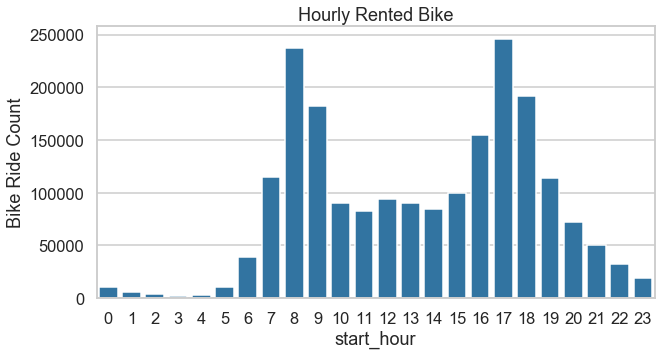

In [148]:
#By Using seaborn i create plot 
plt.figure(figsize = (10,5))
g = sns.countplot(data=df_ford1, x='start_hour',color =base_color);
g.set_title('Hourly Rented Bike');
g.set_ylabel('Bike Ride Count');

#### As we can see from the the graph that 17:00 hours that is 5pm bike rented the most

## Question-2 On which week of day Bike rides the most ?

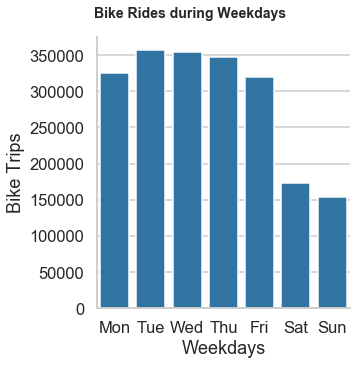

In [150]:
#Create list of weekday
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_ford1, x='start_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "Bike Trips")
g.fig.suptitle('Bike Rides during Weekdays', y=1.03, fontsize=14, fontweight='semibold');

### As we can see from the graogh that Tuesday has high Bike rides in comparison to all weekdays this means that people used to take bikes on weekdays to go to their respective workplaces or schools.

## Question-3 Which month has Highest bike rides ?

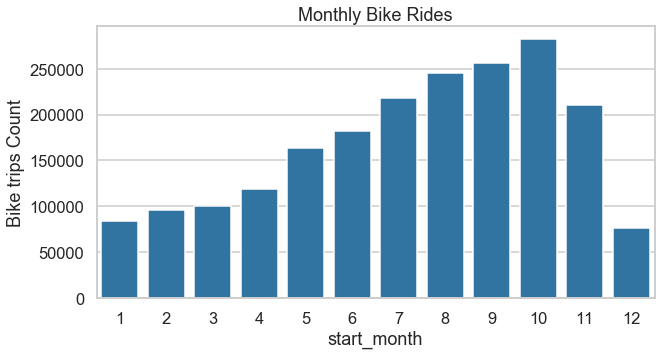

In [151]:
plt.figure(figsize = (10,5))
g = sns.countplot(data=df_ford1, x='start_month',color =base_color);
g.set_title('Monthly Bike Rides');
g.set_ylabel('Bike trips Count');

### As we clearly see from the graph that Month 10 that is October has highest bike rides

## Question - 4 Which Age Group has most bike Rides ?

In [152]:
#Generate a new column member_age_bins from member age group
df_ford1['member_age_bins'] = df_ford1['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [153]:
trip_agegroup_df = df_ford1.groupby('member_age_bins').agg({'bike_id':'count'})

In [154]:
trip_agegroup_df['percentage'] = (trip_agegroup_df['bike_id']/trip_agegroup_df['bike_id'].sum())*100

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

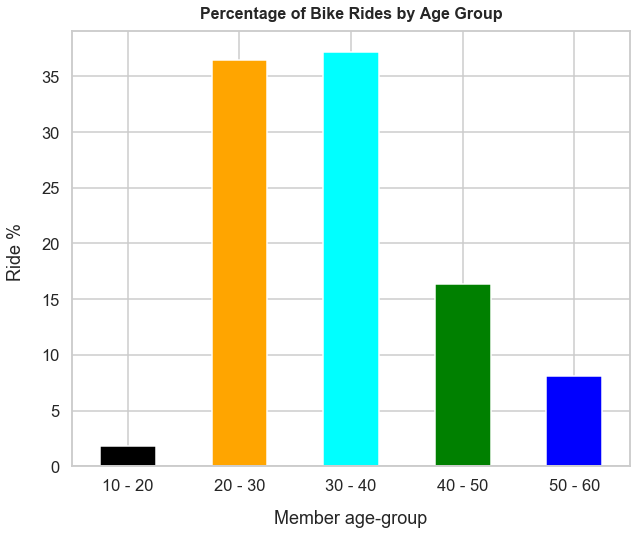

In [157]:
#plot the graph
new_color = ['black', 'orange', 'cyan', 'green', 'blue']
trip_agegroup_df['percentage'].plot(kind='bar', color=new_color, figsize=(10,8))
plt.title('Percentage of Bike Rides by Age Group', fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('Member age-group', labelpad=16)
plt.ylabel('Ride % ', labelpad=16)
plt.xticks(rotation=360)

### As we clearly see from the Graph that Age group of 30-40 has most Rides percentage
### followed by age group of  20-30.

## Question -5 Percentage of Bike riders by gender ?

In [158]:
ride_gender_df = df_ford1.groupby('member_gender').agg({'bike_id':'count'})

In [159]:
ride_gender_df['percentage'] = (ride_gender_df['bike_id']/ride_gender_df['bike_id'].sum())*100

(0, 100)

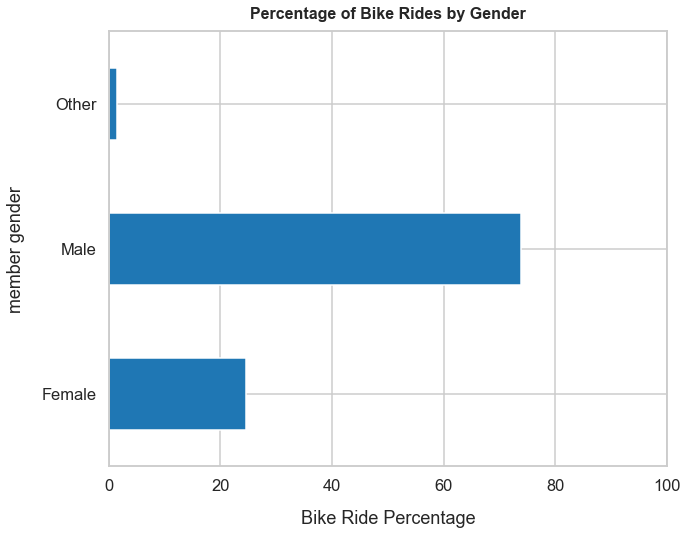

In [161]:
#plotting graph
ride_gender_df['percentage'].plot(kind='barh', color=base_color, figsize=(10,8))
plt.title('Percentage of Bike Rides by Gender', fontsize=16, y=1.015,fontweight='semibold')
plt.ylabel('member gender', labelpad=16)
plt.xlabel('Bike Ride Percentage', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

### As we seen from the Graph about ~75% of Male Rides bike which is more than female and other category.


## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations

Firstly i visually asess the original dataframe then i make changes in it, because data is not ready to be used directly i require some cleaning efforts.I choose the dataframe which consists the member of age less than or equal to 60.so my dataframe reduced to 2032159 bike rides entry.

#### Some conclusion based on above visualization 

 - Month of october has highest bike rides 
 - About 75% of male rides bike which is more than female(25%)
 - Age group of 30-40 rides the bikes most whereas age group 20-30 is growing age group
 - People used this service more in weekdays rather than weekend , as Thuesday has highest bike Rides.
 - Month of October has highest bike Rides.
 - From 8-9am and 5-6pm people uses this Service Most.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one unusal distribution in the dataset that is  member birth year has dates before 1900. There is 95% of the members are between 17 and 57 years. To keep the dataset simple,I removed members greater than 60 years old.And simplify my Dataset by keeping the member of Age is less than or equal to 60. I also generated new columns to calculate age members, weekdays,months,hours for my data analysis and clear visulization. I changed the data types of some columns .

## Part -2 Bivariate Exploration 

### Question - 1 Average Trip Duration by User-Type

In [163]:
#create a new column duration min

df_ford1['duration_min'] = df_ford1['duration_sec']/60

Text(0.5, 0, 'trip duration in minutes')

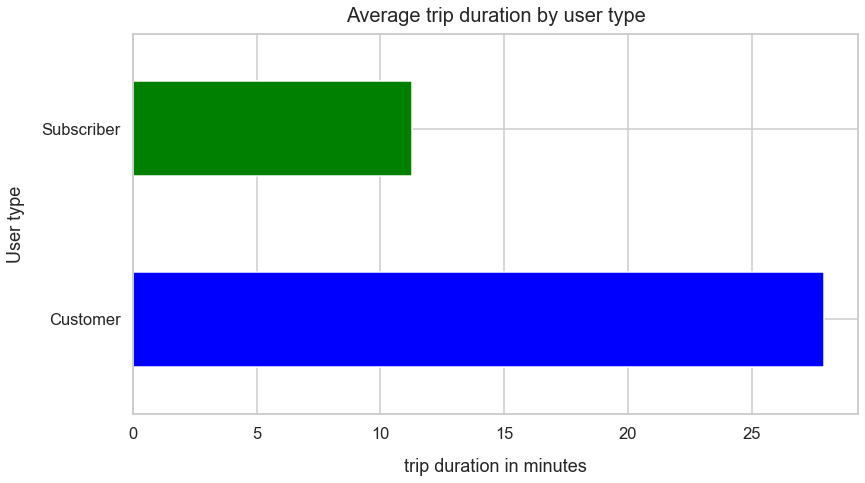

In [164]:
colors=['blue', 'green']
axis = df_ford1.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=colors, figsize=(13,7))
axis.set_title('Average trip duration by user type', fontsize=20, y=1.015)
axis.set_ylabel('User type', labelpad=16)
axis.set_xlabel('trip duration in minutes', labelpad=16)

### So as we clearly see from the graph that 
> Average Subscriber's trip duration is **~11 minutes**

> Average Customer's trip duration is **~28 minutes**

### Question -2 Monthly user-type Trends

In [165]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

In [166]:
df_user_count = df_ford1.groupby(["start_month", "user_type"]).size().reset_index()

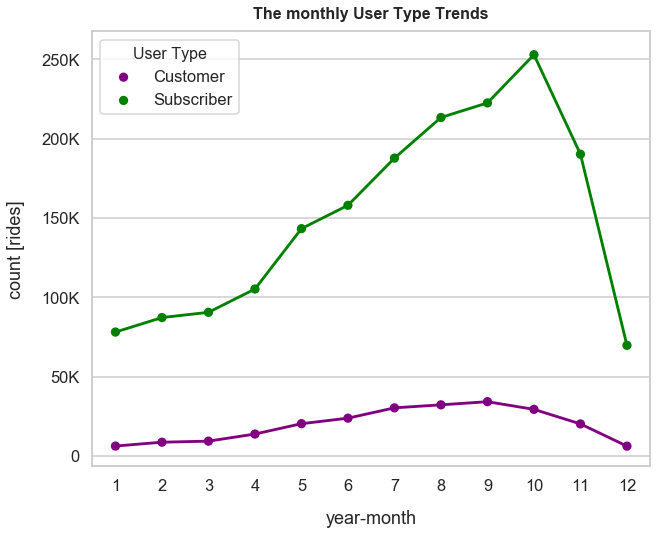

In [167]:
#Plotting 

plt.figure(figsize=(10,8))
colors = {'Subscriber':'Green', 'Customer':'purple'}
ax = sns.pointplot(x='start_month', y=0, hue='user_type', palette=colors, scale=.7, data=df_user_count)
plt.title('The monthly User Type Trends', fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

#### As we seen from the grapgh we can see that 
> Customer's ride seems to be **increasing** upto the month october then it **suddenly decreasing** in moth of November and december. 



## Question -3 Weekly usage Trends by the User-type?

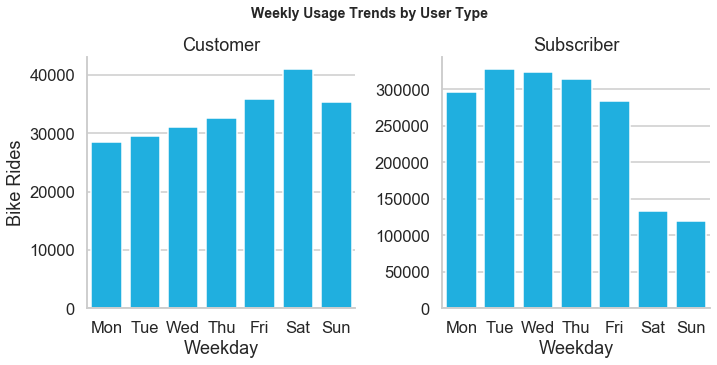

In [168]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_ford1, x='start_weekday', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage Trends by User Type', y=1.03, fontsize=14, fontweight='semibold');

#### Above Graph shows the difference between Customers and subscribers they take the Bike rides on weekdays.

## Question -4 Average Bike - trip Distance of Subscribes Vs Customers ?

In [169]:
#Calculate distance in miles
def distance(origin, destination):
    """
    Parameters
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [170]:
# Convert Kms to Miles
df_ford1['distance_kms'] = df_ford1.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df_ford1['distance_miles'] = df_ford1['distance_kms']*0.621371

Text(0.5, 0, 'Distance in Miles')

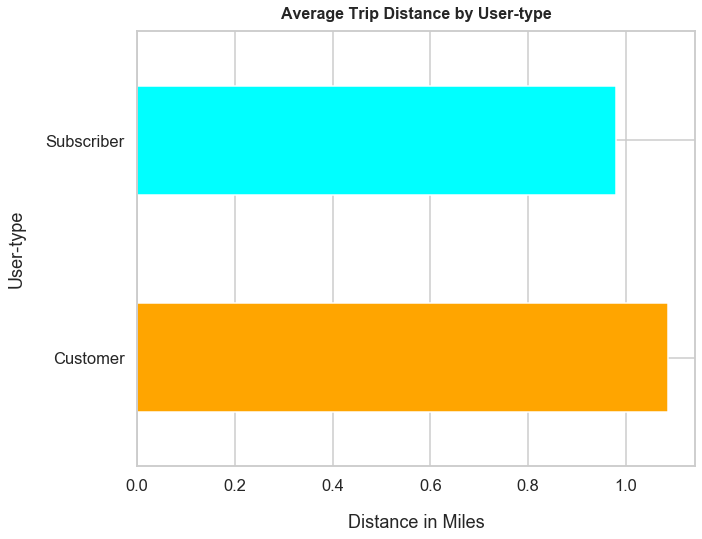

In [171]:
new_color= ['orange','cyan']
ax = df_ford1.groupby('user_type')['distance_miles'].mean().plot(kind='barh', color=new_color, figsize=(10,8))
ax.set_title('Average Trip Distance by User-type', fontsize=16, y=1.015,fontweight='semibold')
ax.set_ylabel('User-type', labelpad=20)
ax.set_xlabel('Distance in Miles', labelpad=20)

#### As from the above Graph we can easily see that Customer and Subscriber has very little difference approx 1 mile difference

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

After doing analysis and visualization i see an interesting differences between Customers and Subscribers behavior patterns.By doing Bi-variate Exploration Analysis as mentioned above , Customers are more causual riders On weekends subscribers didn't uses the service more than a customer. Customer Rides the Bike almost Whole week and gradually increases the rides count from Monday to Saturday. whereas Subscribers uses the service mostly on weekdays on weekends less subscribers uses the service.  

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 I observe that there is a difference in the trip duration between customers and subscribers.Customers took longer trip duration than Subscribers around 28 minutes and customers have more fun during weekends where as subscribers took shorter distance trips around 10-11 mins because they just use it for Work and Home commute purposes. and one other thing is Customers Trip Distance duration is slightly high when compare to Subscribers trip distance with 1.0 Mile difference.

## Part -3 Multivariate Exploration 

### Question-1 Bike Rides by Gender ?

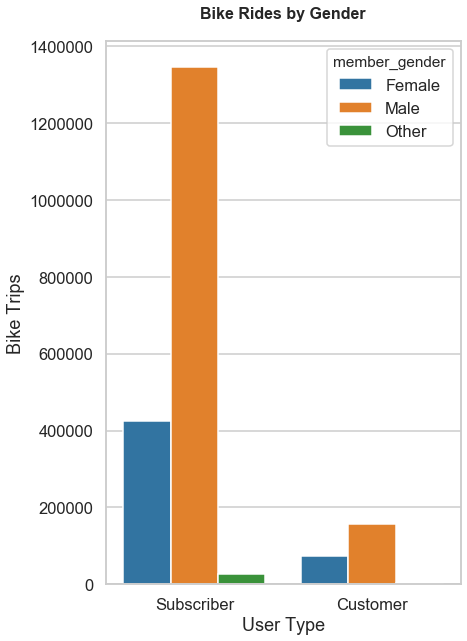

In [174]:
#setting figure Size

plt.figure(figsize = [14, 10])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_ford1, x="user_type", hue="member_gender", order=df_ford1.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')
g.set_title('Bike Rides by Gender', y=1.03, fontsize=16, fontweight='semibold');

#### As by seeing the above graph we clearly see that males  using the service more rather than females or Others category. 

## Question -2 Monthly Bike Trends By the User-type?

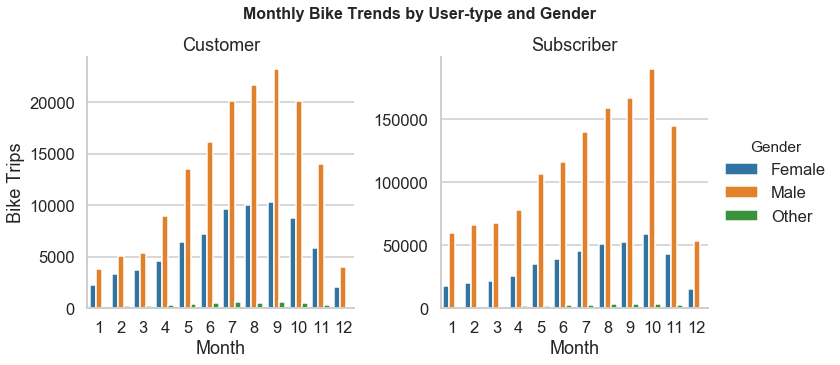

In [175]:
g = sns.catplot(data=df_ford1, x='start_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Bike Trends by User-type and Gender', y=1.03, fontsize=16, fontweight='semibold');

#### As we can easily see from the above Graph that may to octobers trips are increasing but decreases in winter

## Question -3 Bike trips By subscribers member age group ?

In [177]:

df_subs = df_ford1[df_ford1['user_type']=='Subscriber'].groupby(['start_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

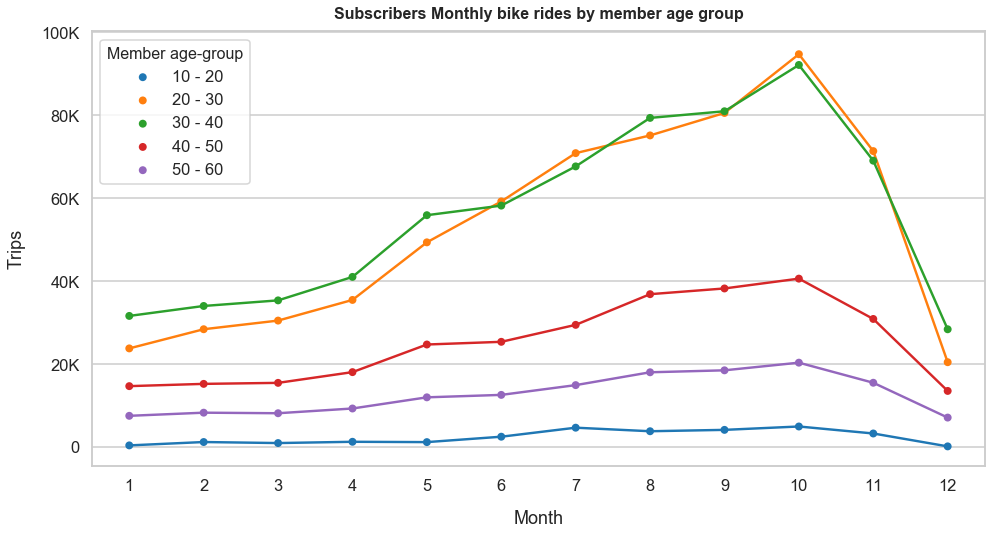

In [178]:
#plotting the multivariate Graph

plt.figure(figsize=(16,8))
ax = sns.pointplot(x='start_month', y='bike_id', hue='member_age_bins', scale=.6, data=df_subs)
plt.title("Subscribers Monthly bike rides by member age group", fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('Month', labelpad=16)
plt.ylabel('Trips', labelpad=16)
leg = ax.legend()
leg.set_title('Member age-group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

## Question - 4 Bike trips by Customer member age-group ?

In [180]:

df_cust = df_ford1[df_ford1['user_type']=='Customer'].groupby(['start_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

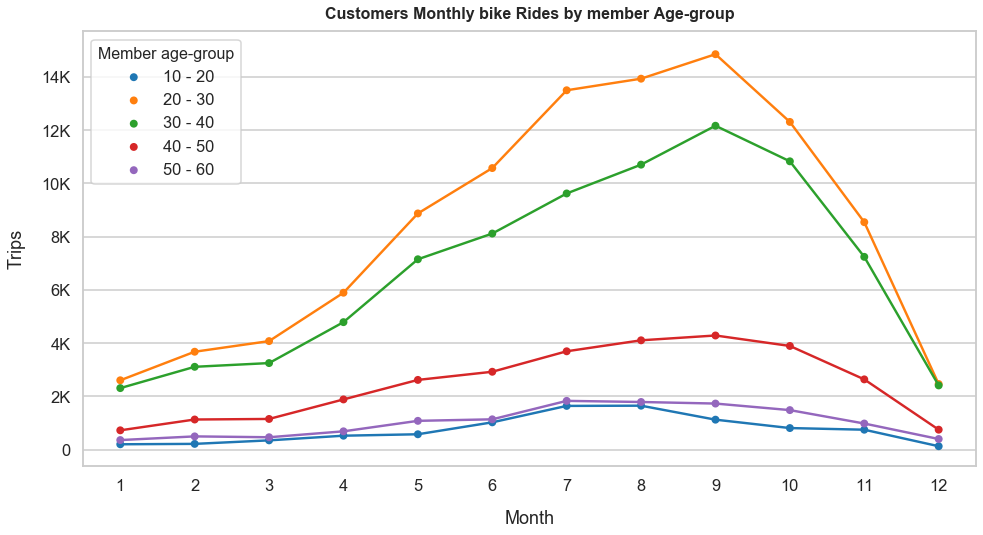

In [181]:
#Plotting 

plt.figure(figsize=(16,8))
ax = sns.pointplot(x='start_month', y='bike_id', hue='member_age_bins', scale=.6, data=df_cust)
plt.title("Customers Monthly bike Rides by member Age-group", fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('Month', labelpad=16)
plt.ylabel('Trips', labelpad=16)
leg = ax.legend()
leg.set_title('Member age-group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

## Question -5 Bike trends of subscriber By Age, Weekdays,Hour Analysis  

In [184]:

# Extract Subscribers age groups between 20 and 60
df1_subs = df_ford1[(df_ford1['member_age']>=20) & (df_ford1['member_age']<60) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Subscriber')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [186]:
#Extract Subscribers age groups between 20 and 30
df2_subs = df_ford1[(df_ford1['member_age']>=20) & (df_ford1['member_age']<30) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Subscriber')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [187]:

df2_subs['count'].head()

0     1495
1     4991
2    10693
3     8801
4     3840
Name: count, dtype: int64

In [188]:
# Extract Subscribers age groups between 30 and 40
df3_subs = df_ford1[(df_ford1['member_age']>=30) & (df_ford1['member_age']<40) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Subscriber')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [189]:
# Extract Subscribers age groups between 40 and 50
df4_subs = df_ford1[(df_ford1['member_age']>=40) & (df_ford1['member_age']<50) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Subscriber')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [190]:

# Extract Weekdays for age groups between 20 and 30
df2_subs['start_weekday'] = pd.Categorical(df2_subs['start_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [191]:
# Extract Weekdays for age groups between 30 and 40
df3_subs['start_weekday'] = pd.Categorical(df3_subs['start_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [192]:
# Extract Weekdays for age groups between 40 and 50
df4_subs['start_weekday'] = pd.Categorical(df4_subs['start_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [193]:
# Calculate Percentage for 20 to 30 age groups
df2_subs['count_percentage'] = df2_subs['count'].apply(lambda x: (x/df1_subs['count'].sum())*100)

In [194]:
# Calculate Percentage for 30 to 40 age groups
df3_subs['count_percentage'] = df3_subs['count'].apply(lambda x: (x/df1_subs['count'].sum())*100)

In [195]:
# Calculate Percentage for 40 to 50 age groups
df4_subs['count_percentage'] = df4_subs['count'].apply(lambda x: (x/df1_subs['count'].sum())*100)

In [196]:
# Calculate Rank in ascending order for 20 to 30 age groups
df2_subs['rank'] = df2_subs['count_percentage'].rank(ascending=False).astype(int)

In [197]:
# Calculate Rank in ascending order for 30 to 40 age groups
df3_subs['rank'] = df3_subs['count_percentage'].rank(ascending=False).astype(int)

In [198]:
# Calculate Rank in ascending order for 40 to 50 age groups
df4_subs['rank'] = df4_subs['count_percentage'].rank(ascending=False).astype(int)

In [200]:
# Create Pivot table for 20 to 30 age groups
pivot2_subs = df2_subs.pivot_table(index='start_hour', columns='start_weekday', values='rank')

In [201]:
# Create Pivot table for 30 to 40 age groups
pivot3_subs = df3_subs.pivot_table(index='start_hour', columns='start_weekday', values='rank')

In [202]:
# Create Pivot table for 40 to 50 age groups
pivot4_subs = df4_subs.pivot_table(index='start_hour', columns='start_weekday', values='rank')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

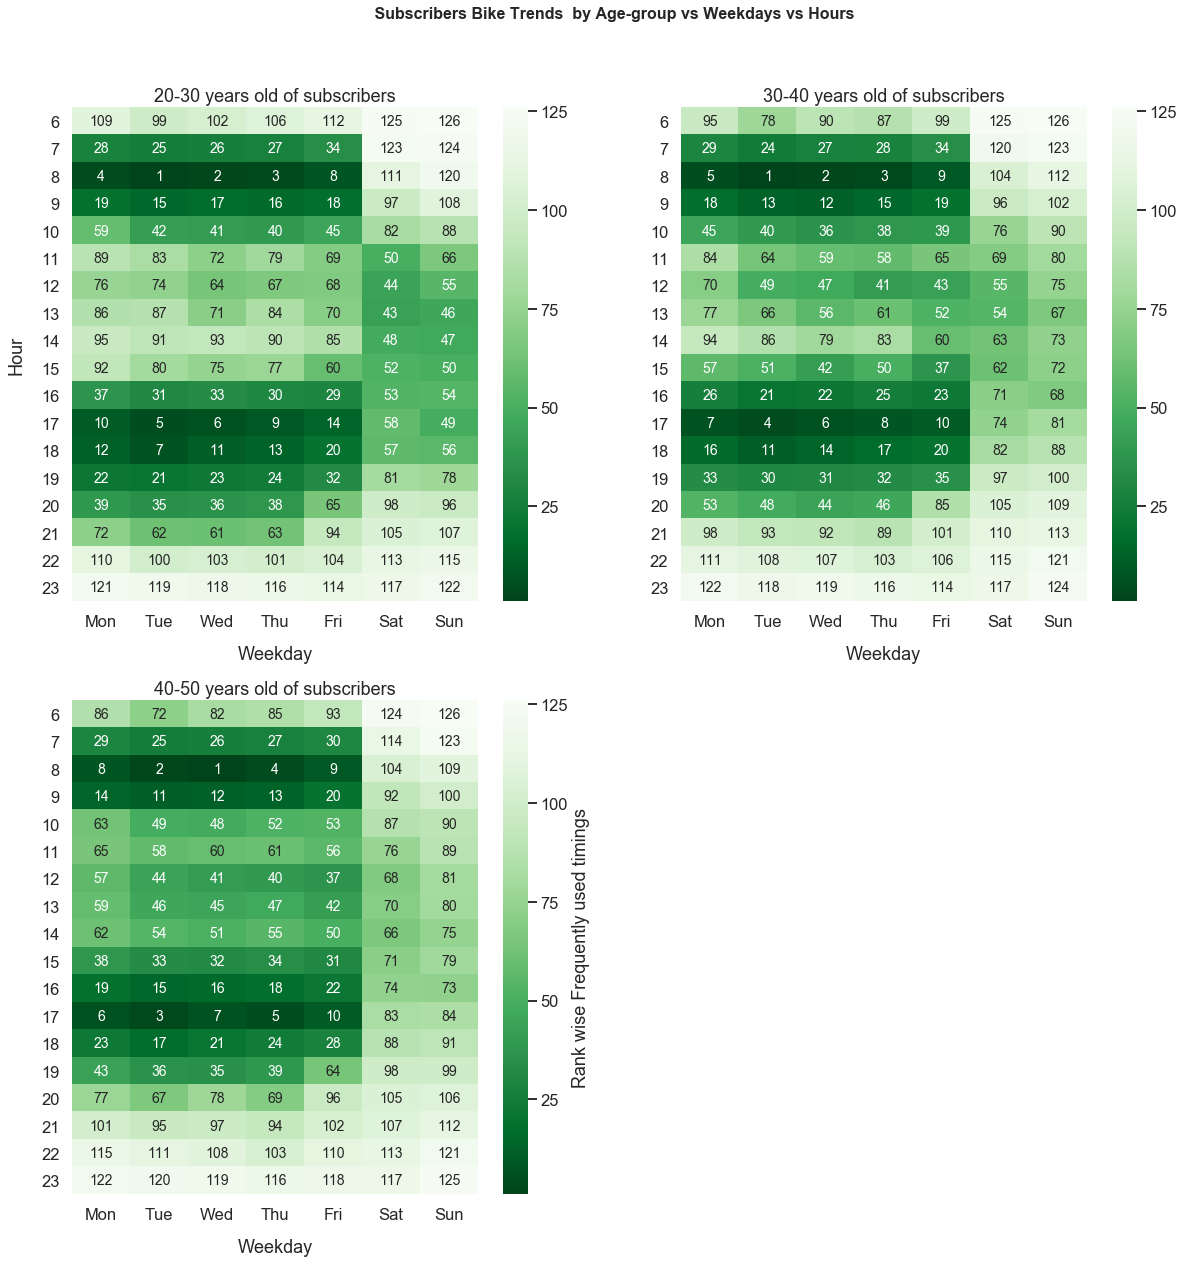

In [203]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Subscribers Bike Trends  by Age-group vs Weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(pivot2_subs, fmt='d', annot=True, cmap='Greens_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(pivot3_subs, fmt='d', annot=True, cmap='Greens_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(pivot4_subs, fmt='d', annot=True, cmap='Greens_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)

##### By seeing the above heatmaps of all 20-30,30-40,40-50 age group years of subscribers use service from Monday to Friday during 7-9am and at 5pm has highest traffic. Subscribers are less active on weekend saturday sunday.This shows that they will just use the service for going to their workplaces or schools.

In [204]:

# Extract Subscribers age groups between 20 and 60
df1_cust = df_ford1[(df_ford1['member_age']>=20) & (df_ford1['member_age']<60) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Customer')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [205]:
#Extract Subscribers age groups between 20 and 30
df2_cust = df_ford1[(df_ford1['member_age']>=20) & (df_ford1['member_age']<30) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Customer')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [206]:

df2_cust['count'].head()

0    103
1    384
2    774
3    703
4    641
Name: count, dtype: int64

In [207]:
# Extract Subscribers age groups between 30 and 40
df3_cust = df_ford1[(df_ford1['member_age']>=30) & (df_ford1['member_age']<40) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Customer')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [208]:
# Extract Subscribers age groups between 40 and 50
df4_cust = df_ford1[(df_ford1['member_age']>=40) & (df_ford1['member_age']<50) 
                              &(df_ford1['start_hour']>5)&(df_ford1['user_type']=='Customer')
                             ].groupby(['start_weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [209]:

# Extract Weekdays for age groups between 20 and 30
df2_cust['start_weekday'] = pd.Categorical(df2_cust['start_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [210]:
# Extract Weekdays for age groups between 30 and 40
df3_cust['start_weekday'] = pd.Categorical(df3_cust['start_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [211]:
# Extract Weekdays for age groups between 40 and 50
df4_cust['start_weekday'] = pd.Categorical(df4_cust['start_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [214]:
# Calculate Percentage for 20 to 30 age groups
df2_cust['count_percentage'] = df2_cust['count'].apply(lambda x: (x/df1_cust['count'].sum())*100)

In [215]:
# Calculate Percentage for 30 to 40 age groups
df3_cust['count_percentage'] = df3_cust['count'].apply(lambda x: (x/df1_cust['count'].sum())*100)

In [216]:
# Calculate Percentage for 40 to 50 age groups
df4_cust['count_percentage'] = df4_cust['count'].apply(lambda x: (x/df1_cust['count'].sum())*100)

In [220]:
# Calculate Rank in ascending order for 20 to 30 age groups
df2_cust['rank'] = df2_cust['count_percentage'].rank(ascending=False).astype(int)

In [217]:
# Calculate Rank in ascending order for 30 to 40 age groups
df3_cust['rank'] = df3_cust['count_percentage'].rank(ascending=False).astype(int)

In [218]:
# Calculate Rank in ascending order for 40 to 50 age groups
df4_cust['rank'] = df4_cust['count_percentage'].rank(ascending=False).astype(int)

In [221]:
# Create Pivot table for 20 to 30 age groups
pivot2_cust = df2_cust.pivot_table(index='start_hour', columns='start_weekday', values='rank')

In [223]:
# Create Pivot table for 30 to 40 age groups
pivot3_cust = df3_cust.pivot_table(index='start_hour', columns='start_weekday', values='rank')

In [224]:
# Create Pivot table for 40 to 50 age groups
pivot4_cust = df4_cust.pivot_table(index='start_hour', columns='start_weekday', values='rank')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

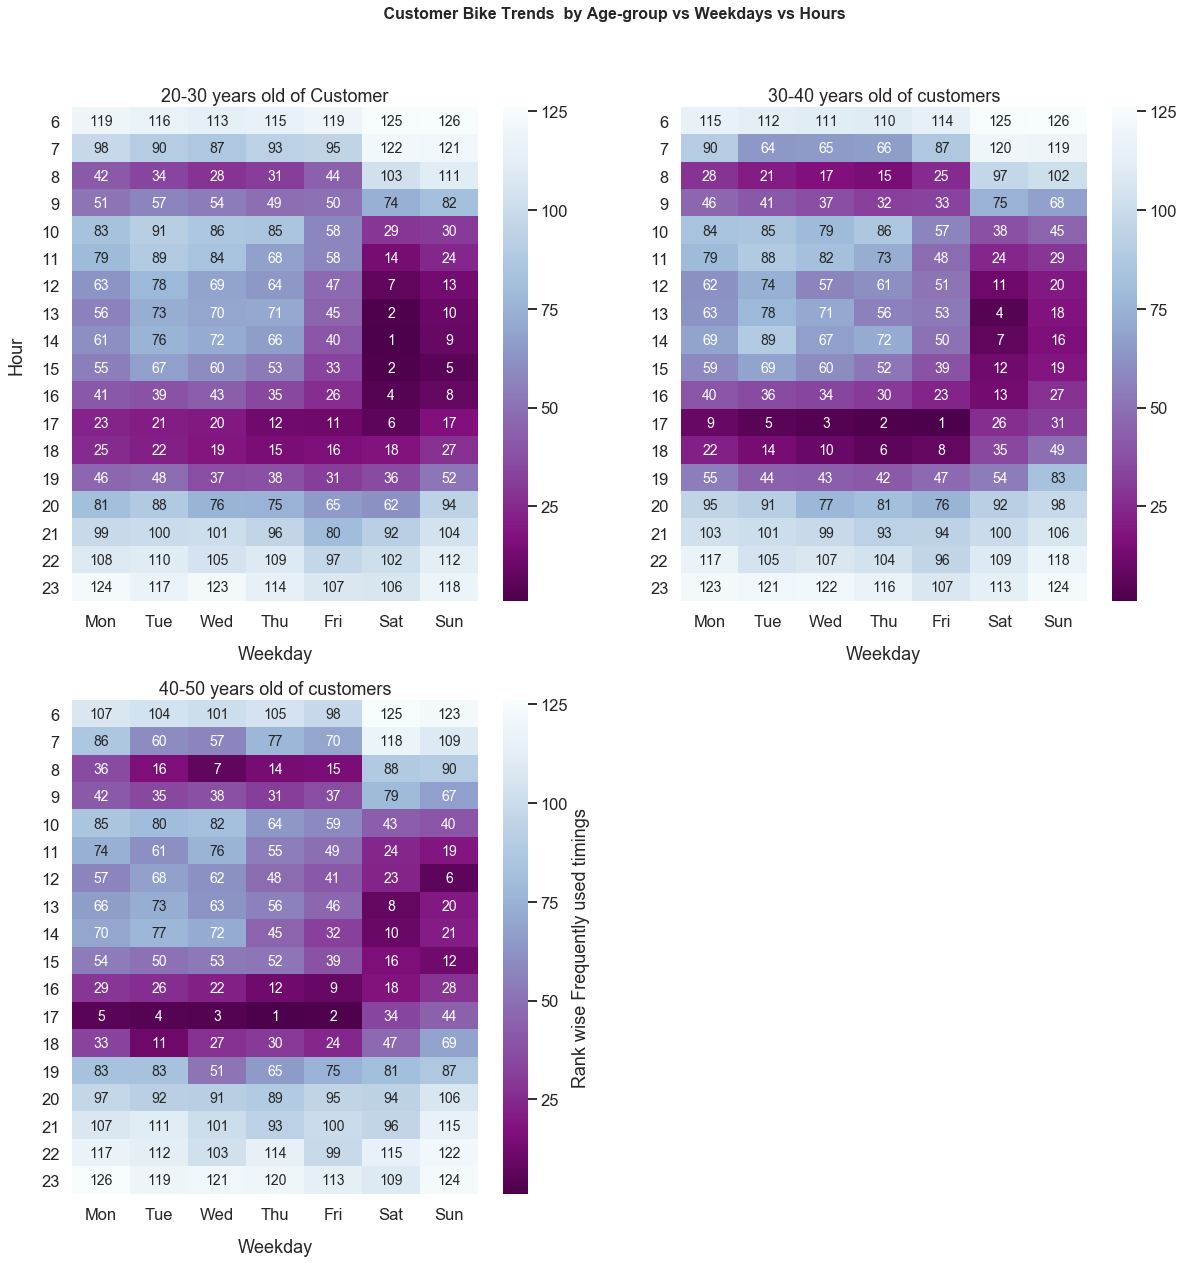

In [226]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Customer Bike Trends  by Age-group vs Weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(pivot2_cust, fmt='d', annot=True, cmap='BuPu_r', annot_kws={"size": 14})
plt.title("20-30 years old of Customer", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(pivot3_cust, fmt='d', annot=True, cmap='BuPu_r', annot_kws={"size": 14})
plt.title("30-40 years old of customers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(pivot4_cust, fmt='d', annot=True, cmap='BuPu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old of customers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)

##### By seeing the above heatmaps of all 20-30,30-40,40-50 age group years of customers use service from Monday to Friday during 8-9am and at 5pm has highest traffic. Customers are also active on weekend that is saturday sunday.This shows that Customer uses the service most on weekends rather than weekdays.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Here in multivariate Exploration Part i analyse the difference the different age-groups of subscribers and customers rides bikes on weekend, hourly. All this work done under Multivariate Exploration Part.by seeing the subscriber heatmap of different age group i observed that subscribers uses the service for going their respective workplaces and schools and offices and during in the 7-9am in morning and 5pm in evening has highest traffic and they uses the service in weekdays more than weekends. whereas As we see the Customer heat maps of different age-groups.and i observe that customer uses the service more on weekends.in morning 8-9am and 4-5pm in the evening. 

## Were there any interesting or surprising interactions between features?

#### The thing which is surprising is that yougsters uses this service and it is continuosly growing the people of age group 20-30 and 30-40 uses the service most. it is quite amazing that Some people that we called subscribers they used the service most on weekdays where some people that we called customers they used this service more on weekends. 

## Conclusion :

I considered 2018 data from 2017 to November 2018.the user of Age-group of 20-30 years are rapidly growing compared to other user groups. First service is started with 30-40 years users and followed by 20-30 yrs age group who became dominant over the year.

Bike Rentals Service Are high in Summer and in winter it is less serviced than summer.Subscribers uses the service most on Weekdays and created traffic on 7-9am in morning and 5-6pm in evening. Customers uses the service most on weekends and created traffic on 8-9am in morning and 4-5pm in evening on weekends that is saturday and sunday.

Males uses the service Most in comaprison to females.

Age-group of 20-30 is rapidly growing group

This all conclusions is based on my analysis and I take dataset of member whose age is less than or equal to 60.

